** Etivity 2**

**Student Name:** Ganapathy

**Student ID: **18202799

Good reference documentation in pandas site:
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
import seaborn as sns
from google.colab import files
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**Task 1 Fill in the Missing Values**

First I will locate the missing values. Then decide after seom profiling the best moethod to fill in the missing data. Removal of records or attributes coudl also be an option.

In [62]:
uploaded = files.upload()

Saving bank_et2.csv to bank_et2 (5).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['bank_et2.csv']))

In [64]:
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [65]:
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [66]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Unnamed: 0        0
age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

So we have 800 missing / blank records. 

age                 12 Missing

job                  10 Missing

education    104 Missing

contact         191 Missing

poutcome    454 Missing


We must understand the types and ranges of these values for each attribute to replace with values. 

Replacement

We can check, using correlation, which attributes inform us about the missing value and impute a suitable one

In [71]:
##Based on chells idea to Abhi, filling the NaN to data & this video helped lot https://www.youtube.com/watch?v=EaGbS7eWSs0
# Mean of age
#df = df.interpolate(method="nearest")
df = df.fillna(method="bfill")
df

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,5,46.0,self-employed,divorced,tertiary,no,926,0.233619,0.922197,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,6,34.0,blue-collar,married,secondary,no,1924,0.022648,0.724227,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,7,45.0,services,divorced,secondary,no,396,-0.724889,-0.998605,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,8,58.0,management,divorced,tertiary,no,315,0.502131,-0.045391,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,9,49.0,management,divorced,tertiary,no,20727,1.331625,-0.420830,no,no,cellular,1,apr,285,3,132,2,failure,no


In [72]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Unnamed: 0       0
age              0
job              0
marital          0
education        0
default          0
balance          0
ratio_bal_ln     0
ratio_ln_inc     0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome        34
subscribed       0
dtype: int64

In [74]:
df[df['poutcome'].isnull()] 

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1966,1966,28.0,management,single,tertiary,no,1584,-0.105527,0.840165,yes,no,cellular,1,sep,222,2,-1,0,NaN,yes
1967,1967,65.0,retired,married,primary,no,308,-1.447720,1.694936,no,no,cellular,1,sep,400,1,-1,0,NaN,yes
1968,1968,22.0,student,single,secondary,no,552,0.266463,1.149014,no,no,cellular,1,sep,327,1,-1,0,NaN,yes
1969,1969,35.0,management,single,tertiary,no,992,0.289730,0.987877,no,yes,cellular,1,sep,238,1,-1,0,NaN,yes
1970,1970,33.0,entrepreneur,single,tertiary,no,1623,-1.280929,-0.146341,yes,no,cellular,2,sep,291,3,-1,0,NaN,yes
1971,1971,25.0,student,single,secondary,no,2975,0.200606,1.078382,no,no,cellular,2,sep,799,2,-1,0,NaN,yes
1972,1972,29.0,unemployed,single,secondary,no,1584,-0.424682,-0.299822,no,no,cellular,6,sep,245,1,-1,0,NaN,yes
1973,1973,72.0,retired,married,secondary,no,1978,0.491401,1.746620,no,no,cellular,6,sep,312,1,-1,0,NaN,yes
1974,1974,33.0,admin.,married,secondary,no,616,0.625250,0.149365,no,no,cellular,6,sep,250,3,-1,0,NaN,yes
1975,1975,45.0,management,married,tertiary,no,406,-2.211965,2.109631,no,no,cellular,7,sep,314,1,-1,0,NaN,yes


In [81]:
df = df.fillna({'poutcome':'failure','poutcome':'success','poutcome':'other'})
df

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,5,46.0,self-employed,divorced,tertiary,no,926,0.233619,0.922197,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,6,34.0,blue-collar,married,secondary,no,1924,0.022648,0.724227,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,7,45.0,services,divorced,secondary,no,396,-0.724889,-0.998605,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,8,58.0,management,divorced,tertiary,no,315,0.502131,-0.045391,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,9,49.0,management,divorced,tertiary,no,20727,1.331625,-0.420830,no,no,cellular,1,apr,285,3,132,2,failure,no


In [83]:
print(df.isnull().sum())
print(df.shape)

Unnamed: 0      0
age             0
job             0
marital         0
education       0
default         0
balance         0
ratio_bal_ln    0
ratio_ln_inc    0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscribed      0
dtype: int64
(2000, 20)


All the missing values has been filled data and we have no bank dataframe (2000 rows and 20 columns)

##Task 2 (CS5062)
Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [92]:
#https://www.youtube.com/watch?v=BhHOdKyFzyQ
df = df.drop(['Unnamed: 0'], axis=1)
df.describe(include=[np.number])

ValueError: ignored

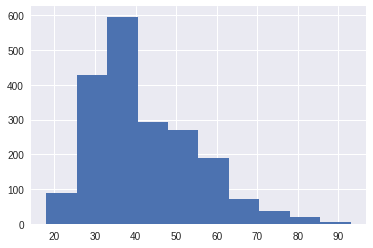

In [93]:
df['age'].hist()

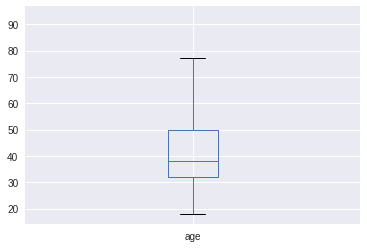

In [94]:
df.boxplot('age')

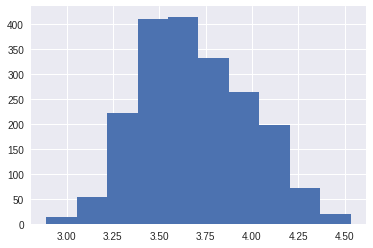

In [95]:
 # Use a log transformation to decrease the impact of extreme values in column age
df['age_log'] = np.log(df['age'])
df['age_log'].hist()

The histograms show that both age_log have distribution closer to normal age

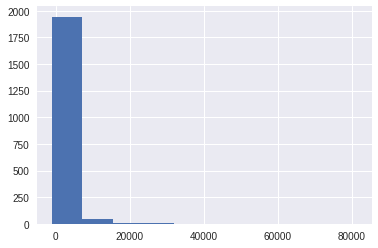

In [96]:
df["balance"].hist()

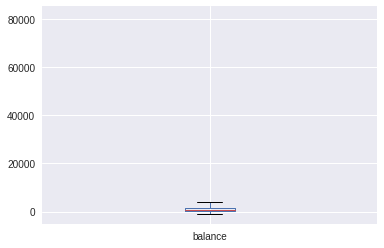

In [97]:
df.boxplot(column='balance')

In [98]:
 # While struggling, I found this option from Abhijit code which was very helpful
  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
# Since negative values are present the Yeo-Johnson transformed is to be preferred.

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
pt.fit(df['balance'].values.reshape(-1, 1))

print(pt.lambdas_)

df['balance_power'] = pt.transform(df['balance'].values.reshape(-1, 1))

[0.78194754]


Outlier detection in balance

In [99]:
df.balance.describe()

count     2000.000000
mean      1413.663500
std       3131.224213
min       -980.000000
25%        201.500000
50%        551.000000
75%       1644.500000
max      81204.000000
Name: balance, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


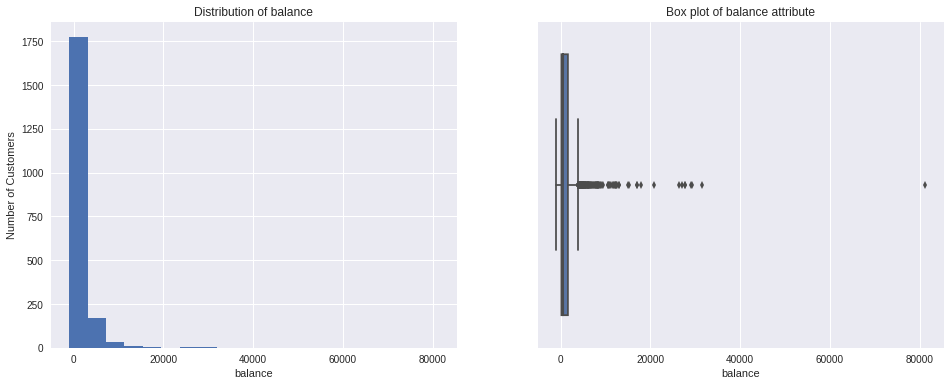

In [100]:
# Create two subplots for balance attribute
plt_fig = plt.figure(figsize=(16,6))

# Plot for balance
axis1 = plt_fig.add_subplot(1, 2, 1)
axis1.set_title("Distribution of balance")
axis1.set_xlabel('balance')
axis1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

axis2 = plt_fig.add_subplot(1, 2, 2)
sns.boxplot(x='balance', data=df, notch=True)
axis2.set_title("Box plot of balance attribute")

plt.show()

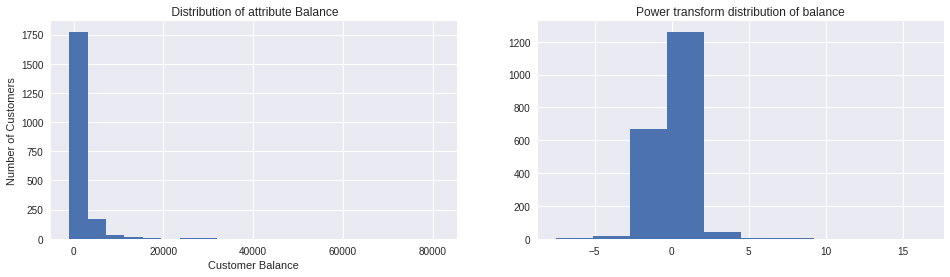

In [101]:
# Create figure with two subplots for BALANCE attribute
fig = plt.figure(figsize=(16,4))

# Plot BALANCE distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title(" Distribution of attribute Balance")
ax1.set_xlabel('Customer Balance')
ax1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

# Distrubtion of balance after appyling Power transform
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Power transform distribution of balance")

df['balance_power'].hist()
plt.show()

The histograms shows both balance_log have distribution closer to normal than the original feature balance


In [0]:
##We have to detect outlier option & found this wonderful video https://www.youtube.com/watch?v=nbNiD76yE8o
def outlier(data):
  #calculate balance mean & standard deviation 
  balance_mean, balance_std = np.mean(data), np.std(data)
  #IQR (3 times of the balance_std)
  IQR = balance_std * 3
  #calculate the outliers 
  Lower_outlier = balance_mean - IQR
  Upper_outlier = balance_mean - IQR
  #identify the outliers
  outliers = [x for x in data if x < Lower_outlier or x > Upper_outlier]
  return outliers

In [103]:
# Outlier detection:

# find outlier in BALANCE 
balance_outliers = outlier(df.balance)

print("Identified outliers BEFORE Log tranformation:", len(balance_outliers))
print("Identified outlier values:", balance_outliers)

Identified outliers BEFORE Log tranformation: 2000
Identified outlier values: [392, 688, 1035, 398, 1004, 926, 1924, 396, 315, 20727, 715, 182, 4613, 508, 0, 0, -30, 560, 1, 4348, 233, 0, 1409, 738, 1631, 489, -421, 136, 0, 496, 3187, 695, -60, 275, 3948, 517, 283, 3082, 292, 169, 8038, 71, 101, 2784, 225, 550, 2502, 14, 221, 1217, 266, 122, 72, 497, 635, 360, 1345, 2299, 0, 15341, 285, 1180, 1743, 0, 686, 3576, 1250, 2643, 1473, 168, 5452, 4867, 6, 1220, 1422, -53, 63, 262, 1664, 5000, 389, 144, 8626, 698, 1258, 1788, 3797, 3402, 67, 775, 0, 0, 393, 195, 596, 399, 1025, 782, 905, 1559, 2764, 3570, 623, 3519, 7546, 629, 2907, 3126, 1071, 265, 660, 294, 1130, 363, 349, 89, 1, -179, 129, 757, 218, 520, 5, 1097, 0, 279, 367, 1222, 451, 3244, 1490, 207, -367, 506, 123, 430, 578, 221, 1103, 358, 97, -94, 514, 507, 614, 44, 289, 583, -271, 304, 447, 407, 778, 533, 659, 174, 478, -75, 51, 15, 798, 534, -196, 719, 442, 336, 8876, 5, 0, 10, 290, 621, 474, 504, 50, -145, 474, 174, 11, 359, 59, 3

In [104]:
# Outlier detection:

# find outlier in BALANCE 
balance_outliers = outlier(df.balance_power)

print("Identified outliers AFTER Log tranformation:", len(balance_outliers))
print("Identified outlier values:", balance_outliers)

Identified outliers AFTER Log tranformation: 2000
Identified outlier values: [-0.28770135096011307, -0.14287360953381745, 0.010246717143485528, -0.2845696325673307, -0.002916172023848801, -0.03643652038513018, 0.35973964383156337, -0.2856123902356139, -0.3288952081180583, 5.286780879055806, -0.1304365760364072, -0.40591957295117637, 1.2525651633337531, -0.22880448736883202, -0.5480053638679683, -0.5480053638679683, -0.6499297904094705, -0.2033837171733509, -0.5462357135779964, 1.171071282338151, -0.3752832540586553, -0.5480053638679683, 0.16306237708849605, -0.11992259742827059, 0.2494892132612959, -0.23823211515626966, -3.0362379009109266, -0.4352020803520027, -0.5480053638679683, -0.23474966193422628, 0.7999089563881934, -0.13963914655051465, -0.7824869513220616, -0.35114576229522326, 1.0459683747255537, -0.22436566109742787, -0.34664227173041945, 0.7650045254694291, -0.3416087666085405, -0.41401286854312674, 2.232768611747788, -0.48076663613440174, -0.4589470882946814, 0.66448698509

## Observation on balance:
The outliers has big difference  before and after applying the log transformation. 

# Task 3 - Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice

In [115]:
#sample of correlation https://www.youtube.com/watch?v=LoiVuDKxXBs
df.corr()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous,age_log,balance_power
age,1.000000,0.139033,-0.027215,0.056561,0.042915,0.076239,-0.007224,0.007676,0.062070,0.984869,0.132845
balance,0.139033,1.000000,-0.079066,0.103384,0.037078,0.096633,0.025103,-0.033014,0.030292,0.120883,0.885286
ratio_bal_ln,-0.027215,-0.079066,1.000000,-0.222818,-0.071667,-0.204453,-0.007049,0.051644,-0.052217,0.003291,-0.109414
ratio_ln_inc,0.056561,0.103384,-0.222818,1.000000,0.050414,0.159398,-0.003781,-0.054520,0.041773,0.035434,0.128622
day,0.042915,0.037078,-0.071667,0.050414,1.000000,0.058597,-0.019719,0.054188,0.063716,0.032136,0.053852
duration,0.076239,0.096633,-0.204453,0.159398,0.058597,1.000000,-0.005188,-0.095650,-0.015965,0.048031,0.135194
campaign,-0.007224,0.025103,-0.007049,-0.003781,-0.019719,-0.005188,1.000000,0.030929,0.140995,-0.005697,0.017473
pdays,0.007676,-0.033014,0.051644,-0.054520,0.054188,-0.095650,0.030929,1.000000,0.218636,0.033278,-0.036964
previous,0.062070,0.030292,-0.052217,0.041773,0.063716,-0.015965,0.140995,0.218636,1.000000,0.062994,0.045975
age_log,0.984869,0.120883,0.003291,0.035434,0.032136,0.048031,-0.005697,0.033278,0.062994,1.000000,0.112132


<Figure size 1152x360 with 0 Axes>

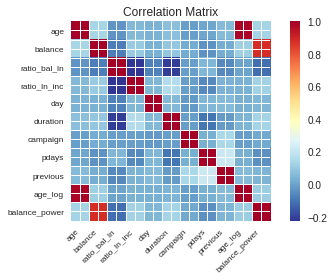

In [114]:
# create correlation matrix
plt.figure(figsize = (16,5))
corr = df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

### Above correlation matrix show that there are no linear relation between any numerical features. Creatig=ng new feature with one OR more variable

In [117]:
df['AD_ratio'] = np.log(df['duration']) / np.log(df['age'])
df['AD_ratio']

0       1.980475
1       1.487907
2       1.186079
3       1.457899
4       1.547186
5       1.603108
6       1.440977
7       1.451522
8       1.181100
9       1.452402
10      1.885183
11      1.468139
12      1.609681
13      1.745184
14      1.287354
15      1.695497
16      1.332030
17      1.142066
18      1.430421
19      1.962999
20      1.253357
21      1.670051
22      1.546457
23      1.623518
24      1.369593
25      1.524635
26      1.438071
27      1.469956
28      1.457380
29      1.791578
          ...   
1970    1.622569
1971    2.076303
1972    1.633732
1973    1.342869
1974    1.579136
1975    1.510350
1976    1.591530
1977    1.377556
1978    2.028197
1979    1.934589
1980    2.051765
1981    1.908018
1982    1.593020
1983    1.744834
1984    1.448249
1985    1.914568
1986    1.687921
1987    1.655658
1988    1.691374
1989    1.706316
1990    1.438053
1991    1.734004
1992    1.207951
1993    1.621555
1994    1.610457
1995    1.932736
1996    2.159512
1997    1.2384

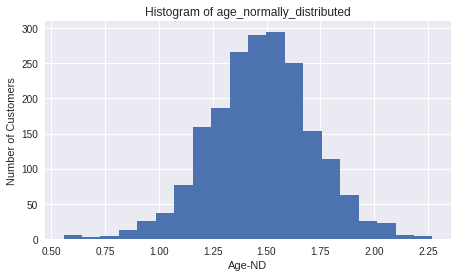

In [118]:
# Plot the age that can be normally distributed
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of age_normally_distributed")
ax1.set_xlabel('Age-ND')
ax1.set_ylabel('Number of Customers')
df['AD_ratio'].hist(bins=20)

## Task 4 - Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression. Plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).